In [212]:
#set up
import pickle
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
import pandas as pd
from wordcloud import WordCloud
import collections 
from matplotlib import pyplot as plt
plt.style.use('ggplot')

In [213]:
data = pickle.load(open("All_email.txt","rb"))

In [214]:
#Seperate to training data/test data
train, test = train_test_split(data, test_size = 0.3)

In [64]:
#training data, testing data
#Text preprocessing
#tokenizing, filtering of stopwords
#word dictionary of features
#transform documents to feature vectors

In [193]:
#tfidf(original,bi,tri)
count = CountVectorizer(ngram_range=(1,1))
count_bi = CountVectorizer(ngram_range=(2,2))
count_tri = CountVectorizer(ngram_range=(3,3))

X_train_counts = count.fit_transform(train['Content'])
tf_transformer = TfidfTransformer(use_idf=False).fit(X_train_counts)
X_train_tf = tf_transformer.transform(X_train_counts)

In [102]:
X_train_counts = count_bi.fit_transform(train['Content'])

In [144]:
c = collections.Counter()
c.update(data['Classification'])
pd.DataFrame({'ham': c['ham'],'spam':c['spam']},index=[0])

,ham,spam
0,60951,98938


In [173]:
year_count = []
for i in ['1999','2000','2001','2002','2003','2004','2005','2006','2007']:
          c=collections.Counter(data[data['Year']==i]['Classification'])
          year_count.append(c)
pd.DataFrame(year_count,index=['1999','2000','2001','2002','2003','2004','2005','2006','2007'])

,ham,spam
1999,2978,4611
2000,8512,2851
2001,9872,848
2002,10663,5280
2003,545,1773
2004,627,13420
2005,1309,18418
2006,1226,2730
2007,25219,49007


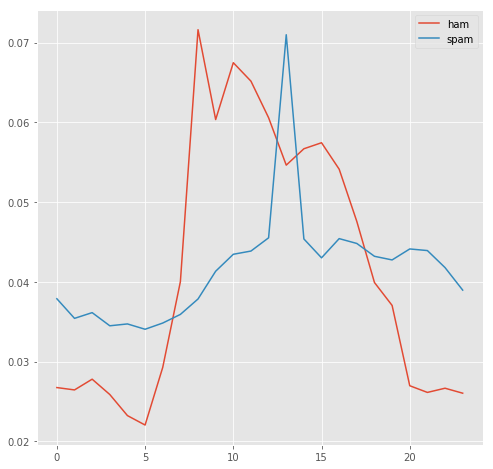

In [273]:
hour_count = []
hour  = ['00','01','02','03','04','05','06','07','08','09','10','11',
         '12','13','14','15','16','17','18','19','20','21','22','23']
for i in hour :
          c=collections.Counter(data[data['Hour']==i]['Classification'])
          hour_count.append(c)
hour_count = pd.DataFrame(hour_count,index=hour)



fig = plt.figure(figsize=[8,8])
line1, = plt.plot(hour_count['ham']/sum(hour_count['ham']), label='ham')
line2, = plt.plot(hour_count['spam']/sum(hour_count['spam']), label='spam')
plt.legend()
plt.show()

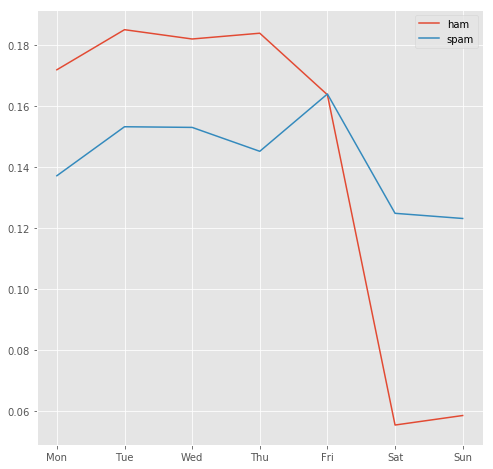

In [282]:
wd_count = []
wd  = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
for i in wd :
          c=collections.Counter(data[data['Weekday']==i]['Classification'])
          wd_count.append(c)
wd_count = pd.DataFrame(wd_count,index=range(7))

fig = plt.figure(figsize=[8,8])
line1, = plt.plot(wd_count['ham']/sum(wd_count['ham']), label='ham')
line2, = plt.plot(wd_count['spam']/sum(wd_count['spam']), label='spam')
plt.xticks(range(7),wd)
plt.legend()
plt.show()

In [ ]:
#fit LinearSVC


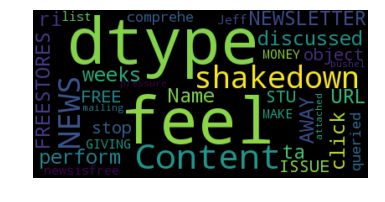

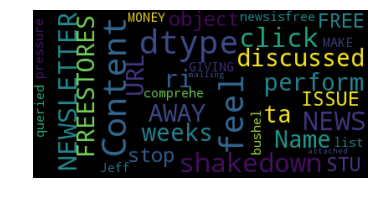

In [85]:
#word cloud
# Generate a word cloud image
wordcloud = WordCloud().generate(str(data['Content'][0]))

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

# lower max_font_size
wordcloud = WordCloud(max_font_size=40).generate(str(data['Content'][0]))
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()